<a href="https://colab.research.google.com/github/hanhluukim/replication-topic-modelling-in-embedding-space/blob/main/notebook_replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Das Projekt aus dem Github klonen und in den Projektsordner**

In [89]:
#wenn die Ordner noch nicht geklont ist, soll dieser Fehler zuerst durchgeführt werden.
!git clone https://github.com/hanhluukim/replication-topic-modelling-in-embedding-space.git

fatal: destination path 'replication-topic-modelling-in-embedding-space' already exists and is not an empty directory.


In [90]:
cd /content/replication-topic-modelling-in-embedding-space

/content/replication-topic-modelling-in-embedding-space


#**Die benötige Paketen für das Projekt mittels requirements.txt installieren**



In [91]:
# Falls die Packages noch nicht installiert wurden, 
!pip install -r "/content/replication-topic-modelling-in-embedding-space/requirements.txt"

# **Gebrauchte Paketen importieren**

In [92]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import umap.umap_ as umap
import time
import plotly.express as px
from sklearn import cluster
from sklearn import metrics

# **Vorverarbeitung und BOW-Repräsentationen für Textdaten durchführen**
1. Vocabular erstellen
2. BOW-Repräsentationen für allen Teildatensätzen

In [93]:
from src.prepare_dataset import TextDataLoader

In [94]:
# init TextDataLoader für die Datenquelle 20 News Groups
# Daten abrufen vom Sklearn, tokenisieren und besondere Charaktern entfernen
textsloader = TextDataLoader(source="20newsgroups", train_size=None, test_size=None)
textsloader.load_tokenize_texts("20newsgroups")
# Beispiel von Textdaten
textsloader.show_example_raw_texts(n_docs=2)

loading texts: ...
finished load!
check some sample texts of the dataset
['From', ':', 'lerxst', '@', 'wam', '.', 'umd', '.', 'edu', '(', "where's", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp', 'Posting', 'Host', ':', 'rac3', '.', 'wam', '.', 'umd', '.', 'edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2', 'door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', '/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', ',', 'engine', 'specs'

In [95]:
# Vorverarbeitung von Daten mit folgenden Schritten:
textsloader.preprocess_texts(length_one_remove=True, punctuation_lower = True, stopwords_filter = True)

start: preprocessing: ...
finised: preprocessing!


In [96]:
# Daten zerlegen für Train, Test und Validation. Erstellen Vocabular aus dem Trainset
min_df=10
textsloader.split_and_create_voca_from_trainset(max_df=0.7, min_df=min_df, stopwords_remove_from_voca=True)

test-document-frequency: 
[[10 12 11 ... 21 22 10]]
vocab-size in df: 1266
start creating vocabulary ...
length of the vocabulary: 1266
sample ten words of the vocabulary: ['talking', 'contact', 'advantage', 'race', 'agree', 'includes', 'bunch', 'andy', 'rate', 'hockey']
length word2id list: 1266
length id2word list: 1266
finished: creating vocabulary


# **LDA Model**

In [97]:
from src.evaluierung import topicCoherence
from gensim.models.coherencemodel import CoherenceModel
from src.lda import lda
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric


# Erstellen BOW-Repräsentation für LDA Model
for_lda_model = True 
word2id, id2word, train_set, test_set, val_set = textsloader.create_bow_and_savebow_for_each_set(for_lda_model=for_lda_model)
gensim_corpus_train_set = train_set

docs_tr, docs_t, docs_v = textsloader.get_docs_in_words_for_each_set()
#lda model
print(100*"-")

ldamodel = lda(train_set,10,id2word)
lda_topics = ldamodel.show_topics(num_words=10)
topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
for topic in lda_topics:
    #print(topic)
    topics.append(preprocess_string(topic[1], filters))
for topic in topics:
  print(topic)
print(100*"-")
tc = topicCoherence(topics,10,docs_tr,len(docs_tr))
print(tc)

#----------using coherence from gensim-----
class DictObj:
  def __init__(self, word2id, id2word):
    self.id2token = id2word
    self.token2id = word2id

my_dict_obj = DictObj(word2id, id2word)
cm = CoherenceModel(topics=topics, texts = docs_tr, corpus = train_set, dictionary = my_dict_obj, coherence='u_mass')
print(cm.get_coherence())

length train-documents-indices : 33578
length of the vocabulary: 1266


start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

compact representation for LDA
----------------------------------------------------------------------------------------------------
['dale', 'israel', 'colorado', 'heart', 'ac', 'systems', 'needed', 'understood', 'strong', 'chicago']
['date', 'purdue', 'christ', 'israel', 'understand', 'mind', 'toronto', 'cleveland', 'ftp', 'thunder']
['israel', 'date', 'christ', 'mind', 'ny', 'rick', 'heart', 'berkeley', 'policy', 'cleveland']
['brown', 'published', 'israel', 'christ', 'drop', 'east', 'keeping', 'chicago', 'date', 'dale']
['date', 'ram', 'happy', 'chicago', 'leave', 'long', 'tools', 'c

# **Data for ETM**

In [98]:
# Erstellen BOW-Repräsentation für ETM Modell
for_lda_model = False
word2id, id2word, train_set, test_set, val_set = textsloader.create_bow_and_savebow_for_each_set(for_lda_model=for_lda_model)


length train-documents-indices : 33578
length of the vocabulary: 1266


start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

id2word befor saving: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 

# **Vocabular und IDs anzeigen als Beispiel**

---





In [99]:
# show for samples: 100 word2id and id2 word
word2id_df_100 = pd.DataFrame()
word2id_df_100['word'] = list(word2id.keys())[:100]
word2id_df_100['id'] = list(word2id.values())[:100]
word2id_df_100

,word,id
0,talking,0
1,contact,1
2,advantage,2
3,race,3
4,agree,4
...,...,...
95,uk,95
96,price,96
97,peace,97
98,count,98


# **Die Größe von Datensätzen kontrollieren**

In [100]:
# Kontrollieren die Größen von verschiedenen Datensätzen
print(f'Size of the vocabulary after prprocessing ist: {len(textsloader.vocabulary)}')
print(f'Size of train set: {len(train_set["tokens"])}')
print(f'Size of val set: {len(val_set["tokens"])}')
print(f'Size of test set: {len(test_set["test"]["tokens"])}')

Size of the vocabulary after prprocessing ist: 1266
Size of train set: 619
Size of val set: 101
Size of test set: 80


# **Dokumenten wiederstellen für Word2Vec Embedding**

---



In [101]:
# re-erstellen von Dokumenten nach der Vorverarbeitungen. Die Dokumenten sind in Wörtern und werden für Word-Embedding Training benutzt
docs_tr, docs_t, docs_v = textsloader.get_docs_in_words_for_each_set()
train_docs_df = pd.DataFrame()
train_docs_df['text-after-preprocessing'] = [' '.join(doc) for doc in docs_tr[:100]]
train_docs_df

,text-after-preprocessing
0,james warning read nntp posting host engineeri...
1,au austin anti question nntp posting host cs o...
2,bill texas university computing services distr...
3,heaven biblical reply university chicago artic...
4,cco caltech kevin nl week california institute...
...,...
95,mi doug distribution world central sale includ...
96,steve reply technology article dale dale write...
97,stanford driver computer science department st...
98,john summary keywords nntp posting host resear...


# **Word-Embedding trainieren mit dem Traindatensatz**

In [102]:
from src.embedding import WordEmbeddingCreator
from pathlib import Path

save_path = Path.joinpath(Path.cwd(), f'prepared_data/min_df_{min_df}')
figures_path = Path.joinpath(Path.cwd(), f'figures/min_df_{min_df}')
Path(figures_path).mkdir(parents=True, exist_ok=True)

wb_creator = WordEmbeddingCreator(model_name="skipgram", documents = docs_tr, save_path= save_path)
wb_creator.train(min_count=0, embedding_size= 300)
vocab = list(word2id.keys())
wb_creator.create_and_save_vocab_embedding(vocab, save_path)
wb_creator.cluster_words(save_path, figures_path, n_components=2, text = False)

train begin:word-embedding with skipgram
word-embedding train finished
length of vocabulary from word-embedding model 1266
length of the vocabulary of prepraring-dataset-vocabulary: 1266


100%|██████████| 1266/1266 [00:00<00:00, 1942.96it/s]


Cluster id labels for inputted data
[8 1 1 ... 8 1 8]
Centroids data
[[ 8.87494805e-02  1.49222399e-02  5.22828200e-02 ...  9.43244256e-02
   4.35621769e-02  7.33457271e-02]
 [ 1.05994615e-01  5.47219753e-03  5.58091683e-02 ...  6.42180293e-02
   4.15632112e-03  4.52883111e-02]
 [ 2.85312797e-02  6.52575295e-02  5.69996294e-02 ...  2.66089723e-01
   2.44440961e-01  2.33302460e-01]
 ...
 [ 1.35476300e-01 -9.97857848e-03  6.29632116e-02 ...  1.40111579e-02
  -5.87174899e-02  6.67840304e-04]
 [ 1.17703246e-01 -1.00042720e-04  5.89381612e-02 ...  4.72140953e-02
  -1.79069537e-02  2.98903987e-02]
 [ 4.26100108e-02  4.74440137e-02  4.47826040e-02 ...  1.92654880e-01
   1.51377370e-01  1.58386448e-01]]


True

In [103]:
v = list(wb_creator.model.wv.vocab)[0]
vec = list(wb_creator.model.wv.__getitem__(v))
print(f'word-embedding of the word-- {v}: ')
print(f'vector: {vec}')
print(f'dim of vector: {len(vec)}')

word-embedding of the word-- james: 
vector: [0.06944553, 0.024499515, 0.049195305, 0.0974121, -0.046740707, -0.036208067, 0.058367148, 0.04189724, 0.007965271, 0.06157647, 0.09793002, -0.029849224, -0.02346307, -0.06360327, 0.039787997, 0.053476248, -0.13927346, 0.0149286045, 0.083220884, -0.030628484, -0.09049001, -0.046636116, -0.18143876, 0.028458523, -0.04244905, -0.03554453, 0.08943475, 0.0054003755, 0.049664304, -0.07068339, 0.030841876, 0.19362742, -0.103325166, -0.02184619, 0.12076591, 0.12633462, 0.032616176, 0.13874714, 0.1221787, -0.03935868, -0.013814944, -0.025482189, 0.15705818, -0.123069316, -0.0045428323, -0.010522082, 0.0054216255, -0.01535007, -0.017188216, -0.0863093, 0.047685277, -0.008625167, 0.07313633, 0.067758344, -0.06528139, 0.021102265, -0.08203002, -0.027862187, 0.0073411353, -0.07883647, -0.08419522, -0.028042061, 0.043983996, -0.08321871, -0.049971037, 0.014884996, 0.06952187, 0.038171444, -0.06484508, 0.046941705, -0.01975069, 0.048473332, 0.11006451, -0

# **Word-Embeddings visualieren als Beispiel**


In [104]:
"""
# read word-embedding files
with open(save_path) as f:
  lines = f.readlines()
embedding_data = []
words_data = []
for t in lines:
  w = t.split("\t")[0]
  v = [float(e) for e in t.split("\t")[1].split(" ")]
  words_data.append(w)
  embedding_data.append(v)

# clustering words with KMeans and Words-Vectors
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(embedding_data)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
#print ("Centroids data")
#print (centroids)


# dimension reduction with umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(embedding_data)
print('Duration: {} seconds'.format(time.time() - start))

# show samples after dim-reduction in dataframe
wb = pd.DataFrame(embedding, columns=['x', 'y', 'z'])
wb['word'] = words_data
wb['cluster'] = ['cluster ' + str(c) for c in labels]

# visualization
fig = px.scatter_3d(wb, 
                    text = wb['word'],
                    x='x', y='y', z='z',
                    color = wb['cluster'],
                    title ="word-embedding-samples")
fig.show()
"""

'\n# read word-embedding files\nwith open(save_path) as f:\n  lines = f.readlines()\nembedding_data = []\nwords_data = []\nfor t in lines:\n  w = t.split("\t")[0]\n  v = [float(e) for e in t.split("\t")[1].split(" ")]\n  words_data.append(w)\n  embedding_data.append(v)\n\n# clustering words with KMeans and Words-Vectors\nkmeans = cluster.KMeans(n_clusters=10)\nkmeans.fit(embedding_data)\n \nlabels = kmeans.labels_\ncentroids = kmeans.cluster_centers_\n \nprint ("Cluster id labels for inputted data")\nprint (labels)\n#print ("Centroids data")\n#print (centroids)\n\n\n# dimension reduction with umap\nstart = time.time()\nreducer = umap.UMAP(random_state=42,n_components=3)\nembedding = reducer.fit_transform(embedding_data)\nprint(\'Duration: {} seconds\'.format(time.time() - start))\n\n# show samples after dim-reduction in dataframe\nwb = pd.DataFrame(embedding, columns=[\'x\', \'y\', \'z\'])\nwb[\'word\'] = words_data\nwb[\'cluster\'] = [\'cluster \' + str(c) for c in labels]\n\n# visual

# **ETM Model**

ETM hat die Architektur eines Variational Autoencoders. 
ETM wird mit den pretrainierten Embedding kombiniert. Die Embeddings für Topics werden als Gewichten eines Teiles des Netzes aktualiert mittels der ELBO Loss

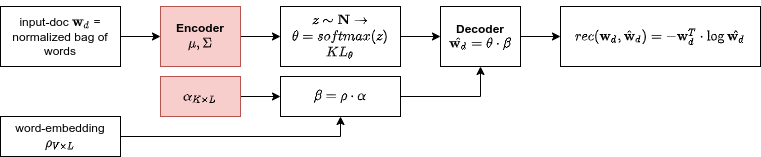

In [105]:
# using DocSet to use easier the modul DataSet from torch
from src.train_etm import DocSet, TrainETM
from src.etm import ETM
import torch

vocab_size = len(list(word2id.keys()))
tr_set = DocSet("train", vocab_size, train_set, normalize_data=True)
print(f'number train-samples: {len(tr_set)}')
print(f'sum of sample vector: {sum(tr_set.__getitem__(0))}')
print(f'length of sample vector: {torch.norm(tr_set.__getitem__(0))}')

number train-samples: 619
sum of sample vector: 1.0
length of sample vector: 0.14657549560070038


**Trainingsparametern vorbereiten**




In [120]:
class TrainArguments:
      def __init__(self, epochs, batch_size, log_interval):
          self.epochs = epochs
          self.batch_size = batch_size
          self.log_interval = log_interval

class OptimizerArguments:
      def __init__(self, optimizer_name, lr, wdecay):
            self.optimizer = optimizer_name
            self.lr = lr
            self.wdecay = wdecay
            
train_args = TrainArguments(epochs=100, batch_size=100, log_interval=None)
optimizer_args = OptimizerArguments(optimizer_name="adam", lr=0.001, wdecay=0.1)
print(train_args.epochs)
print(optimizer_args.optimizer)

from src.embedding import read_prefitted_embedding
embedding_data = read_prefitted_embedding(vocab, save_path)
num_topics = 10
t_hidden_size = 800
rho_size = len(embedding_data[0])
emb_size = len(embedding_data[0])
theta_act = "tanh"

100
adam


**ETM initialisieren**

In [121]:
# define the ETM-model with setting-parameters
etm_model = ETM(
      num_topics, 
      vocab_size, 
      t_hidden_size, rho_size, emb_size, theta_act, 
      embedding_data, 
      enc_drop=0.5)

print(etm_model)

ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): Tanh()
  (topic_embeddings_alphas): Linear(in_features=300, out_features=10, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=1266, out_features=800, bias=True)
    (1): Tanh()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): Tanh()
  )
  (mu_q_theta): Linear(in_features=800, out_features=10, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=10, bias=True)
)


**trainieren**

number of batches: 6
Epoch: 1/100  -  Loss: 7.1424 	 Rec: 7.14015 	 KL: 0.00225
Epoch: 2/100  -  Loss: 7.13432 	 Rec: 7.13378 	 KL: 0.00054
Epoch: 3/100  -  Loss: 7.128 	 Rec: 7.12766 	 KL: 0.00034
Epoch: 4/100  -  Loss: 7.12271 	 Rec: 7.12249 	 KL: 0.00022
Epoch: 5/100  -  Loss: 7.11799 	 Rec: 7.11788 	 KL: 0.00011
Epoch: 6/100  -  Loss: 7.1142 	 Rec: 7.11415 	 KL: 4e-05
Epoch: 7/100  -  Loss: 7.11152 	 Rec: 7.1115 	 KL: 2e-05
Epoch: 8/100  -  Loss: 7.10788 	 Rec: 7.10786 	 KL: 1e-05
Epoch: 9/100  -  Loss: 7.10533 	 Rec: 7.10532 	 KL: 1e-05
Epoch: 10/100  -  Loss: 7.10224 	 Rec: 7.10224 	 KL: 1e-05
Epoch: 11/100  -  Loss: 7.10064 	 Rec: 7.10063 	 KL: 0.0
Epoch: 12/100  -  Loss: 7.0991 	 Rec: 7.0991 	 KL: 0.0
Epoch: 13/100  -  Loss: 7.09721 	 Rec: 7.09721 	 KL: 0.0
Epoch: 14/100  -  Loss: 7.096 	 Rec: 7.096 	 KL: 0.0
Epoch: 15/100  -  Loss: 7.09571 	 Rec: 7.09571 	 KL: 0.0
Epoch: 16/100  -  Loss: 7.09555 	 Rec: 7.09555 	 KL: 0.0
Epoch: 17/100  -  Loss: 7.0952 	 Rec: 7.0952 	 KL: 0.0
Ep

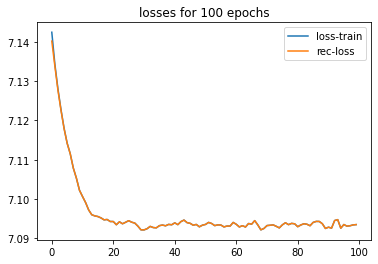

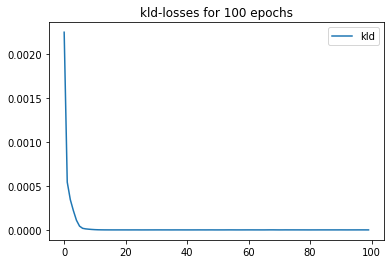

tensor([0.0007, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0007], device='cuda:0')
tensor(1., device='cuda:0')
[('nntp', 0.0012853952357545495), ('posting', 0.0012806410668417811), ('host', 0.0012746641878038645), ('distribution', 0.001220080303028226), ('article', 0.0011561582796275616), ('reply', 0.0011443521361798048), ('cc', 0.0011273466516286135), ('sun', 0.0011207697680220008), ('uk', 0.0011206648778170347), ('usa', 0.0011180887231603265), ('university', 0.001105933217331767), ('ac', 0.0011013417970389128), ('apr', 0.0010846885852515697), ('uiuc', 0.0010844138450920582), ('newsreader', 0.0010811020620167255), ('nasa', 0.001080055022612214), ('cs', 0.001078509958460927), ('ca', 0.001072222599759698), ('gov', 0.0010674254735931754), ('tin', 0.0010623660637065768)]
[('nntp', 0.0012073683319613338), ('posting', 0.0012035723775625229), ('host', 0.0011985963210463524), ('distribution', 0.0011535166995599866), ('article', 0.0011005793930962682), ('reply', 0.0010907900286838412), ('cc', 0.0

In [122]:
#--------------------------training----------------------------------------------------
train_class = TrainETM().train(
    etm_model,
    vocab_size, 
    train_args, optimizer_args, train_set,
    normalize_data = True,
    figures_path = figures_path)
    #num_topics, t_hidden_size, rho_size, emb_size, theta_act,  embedding_data, 0.5)

#-------------------show topics
topics = etm_model.show_topics(id2word, 20)
for tp in topics:
  print(tp)

#----------------
from src.visualization import show_embedding_with_kmeans_umap
show_embedding_with_kmeans_umap(
    id2word, embedding_data, num_topics, etm_model.topic_embeddings_alphas.weight,
    figures_path)

In [123]:
#-------------------show topics
topics = etm_model.show_topics(id2word, 20)
for tp in topics:
  print(tp)


tensor([0.0007, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0007], device='cuda:0')
tensor(1., device='cuda:0')
[('nntp', 0.0012853952357545495), ('posting', 0.0012806410668417811), ('host', 0.0012746641878038645), ('distribution', 0.001220080303028226), ('article', 0.0011561582796275616), ('reply', 0.0011443521361798048), ('cc', 0.0011273466516286135), ('sun', 0.0011207697680220008), ('uk', 0.0011206648778170347), ('usa', 0.0011180887231603265), ('university', 0.001105933217331767), ('ac', 0.0011013417970389128), ('apr', 0.0010846885852515697), ('uiuc', 0.0010844138450920582), ('newsreader', 0.0010811020620167255), ('nasa', 0.001080055022612214), ('cs', 0.001078509958460927), ('ca', 0.001072222599759698), ('gov', 0.0010674254735931754), ('tin', 0.0010623660637065768)]
[('nntp', 0.0012073683319613338), ('posting', 0.0012035723775625229), ('host', 0.0011985963210463524), ('distribution', 0.0011535166995599866), ('article', 0.0011005793930962682), ('reply', 0.0010907900286838412), ('cc', 0.0

In [124]:
print(docs_tr[0])

['james', 'warning', 'read', 'nntp', 'posting', 'host', 'engineering', 'computer', 'network', 'university', 'usa', 'article', 'matthew', 'national', 'university', 'writes', 'james', 'writes', 'argue', 'issue', 'weapons', 'thought', 'worse', 'things', 'world', 'glad', 'give', 'reason', 'fire', 'gun', 'people', 'kill', 'honest', 'care', 'car', 'watch', 'responsible', 'gun', 'punishment', 'fit', 'crime', 'worth', 'killing', 'situation', 'people', 'turn', 'quickly', 'worth', 'life', 'line', 'james', 'james', 'law', 'center', 'ucs', 'disclaimer', 'play', 'work', 'calls', 'thunder', 'hell', 'thing', 'killing', 'man']


In [125]:
print(train_set.keys())

dict_keys(['tokens', 'counts'])


In [126]:
topics = [[e[0] for e in tp] for tp in topics]
for tp in topics:
  print(tp)

tc = topicCoherence(topics,num_topics,docs_tr,len(docs_tr))
print(tc)

"""
#----------using coherence from gensim-----
class DictObj:
  def __init__(self, word2id, id2word):
    self.id2token = id2word
    self.token2id = word2id

my_dict_obj = DictObj(word2id, id2word)
cm = CoherenceModel(topics=topics, texts = docs_tr, corpus = gensim_corpus_train_set, dictionary = my_dict_obj, coherence='u_mass')
print(cm.get_coherence())
"""

['nntp', 'posting', 'host', 'distribution', 'article', 'reply', 'cc', 'sun', 'uk', 'usa', 'university', 'ac', 'apr', 'uiuc', 'newsreader', 'nasa', 'cs', 'ca', 'gov', 'tin']
['nntp', 'posting', 'host', 'distribution', 'article', 'reply', 'cc', 'uk', 'sun', 'usa', 'university', 'ac', 'apr', 'uiuc', 'newsreader', 'nasa', 'cs', 'ca', 'gov', 'tin']
['nntp', 'posting', 'host', 'distribution', 'article', 'reply', 'cc', 'uk', 'sun', 'usa', 'ac', 'university', 'newsreader', 'apr', 'uiuc', 'cs', 'ca', 'nasa', 'gov', 'tin']
['nntp', 'posting', 'host', 'distribution', 'article', 'reply', 'cc', 'uk', 'sun', 'usa', 'university', 'ac', 'apr', 'uiuc', 'newsreader', 'nasa', 'cs', 'ca', 'gov', 'tin']
['nntp', 'posting', 'host', 'distribution', 'article', 'reply', 'cc', 'sun', 'uk', 'usa', 'university', 'ac', 'uiuc', 'apr', 'nasa', 'newsreader', 'cs', 'ca', 'gov', 'tin']
['nntp', 'posting', 'host', 'distribution', 'article', 'reply', 'cc', 'sun', 'uk', 'usa', 'university', 'ac', 'uiuc', 'apr', 'newsreade

"\n#----------using coherence from gensim-----\nclass DictObj:\n  def __init__(self, word2id, id2word):\n    self.id2token = id2word\n    self.token2id = word2id\n\nmy_dict_obj = DictObj(word2id, id2word)\ncm = CoherenceModel(topics=topics, texts = docs_tr, corpus = gensim_corpus_train_set, dictionary = my_dict_obj, coherence='u_mass')\nprint(cm.get_coherence())\n"